## ANALYSE DER DATEN

In [2]:
%matplotlib inline
# pandas for data manipulation
import pandas as pd
pd.options.mode.chained_assignment = None
# nltk for nlp
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

import treetaggerwrapper
from string import punctuation
from collections import Counter
import re
import numpy as np

stopwords = set(stopwords.words('german'))
ttagger = treetaggerwrapper.TreeTagger(TAGLANG='de',TAGDIR=r"C:\Users\E6410\Desktop\textmining\tree-tagger-windows-3.2\TreeTagger")
            


In [3]:
import pandas
#Öffnen der Daten
data1=pandas.read_json("FOCUS.json")
data2=pandas.read_json("SPIEGEL.json")
data3=pandas.read_json("ZEITG.json")
data4=pandas.read_json("BILD.json")


In [4]:

df1=pandas.read_json( (data1['articles']).to_json(),orient='index')
df2=pandas.read_json( (data2['articles']).to_json(),orient='index')
df3=pandas.read_json( (data3['articles']).to_json(),orient='index')
df4=pandas.read_json( (data4['articles']).to_json(),orient='index')

In [5]:
#Hinzufügen von Nachrichtenquellen in die Spalte "Author"
df1.loc[:, 'author'] = 'focus'
df2.loc[:, 'author'] = 'spiegel'
df3.loc[:, 'author'] = 'zeit'
df4.loc[:, 'author'] = 'bild'

In [6]:
#Zusammenführung der Dataen
frames = [df1, df2, df3,df4]
result = pd.concat(frames, ignore_index=True)
result[:5]

,author,description,publishedAt,title,url,urlToImage
0,focus,Alle Rettungsversuche blieben erfolglos: Mit e...,2017-05-12T17:17:48Z,Deutschlands Schulden-Hauptstadt: Wähler sauer...,http://www.focus.de/politik/deutschland/landta...,http://p5.focus.de/img/fotos/crop7127876/42327...
1,focus,RB Leipzig gegen den FC Bayern am 33. Bundesli...,2017-05-13T10:36:20Z,RB Leipzig - FC Bayern im Live-Ticker: 1:0 - S...,http://www.focus.de/sport/fussball/bundesliga1...,http://p5.focus.de/img/fotos/crop7129520/33127...
2,focus,Mit der eigenwilligen Interpretation seines Ha...,2017-05-12T16:52:46Z,Uli Hoeneß hat seine Wirkung verloren: Botscha...,http://www.focus.de/sport/fussball/bundesliga1...,http://p5.focus.de/img/fotos/crop7127621/88527...
3,focus,Das Eigenheim ist die beste Geldanlage fürs Al...,2017-05-15T11:44:06Z,Trügerischer Immobilienboom: 86.000 Euro Verlu...,http://www.focus.de/immobilien/kaufen/postbank...,http://p5.focus.de/img/kaufen/crop7135258/4102...
4,focus,"Die AfD ist am Sonntag mit 7,4 Prozent in den ...",2017-05-15T17:44:50Z,Gestaltung der Stimmzettel sorgt für Wirbel: A...,http://www.focus.de/politik/videos/gestaltung-...,http://p5.focus.de/img/fotos/crop7136934/57727...


In [7]:
result.shape

(900, 6)

In [8]:
train_data = result[~result['description'].isnull()]

In [9]:
train_data['len'] = result['description'].map(len)

## Textverarbeitung: Tokenisierung

Für jede Beschreibung:

 Brechen die Beschreibungen in Sätze und brechen dann die Sätze in tokens
 Interpunktion  und Stoppwörter werden entfernt.


In [10]:
import collections
import nltk

def closed_class(pos):
    if pos[0] == '$':
        return True
    elif pos in ["APPR", "APPRART", "APPO", "APZR", "ART", "KOUI", "KOUS", "KON", "KOKOM", "PDS", "PDAT", "PIS", "PIAT", "PIDAT", "PPER", "PPOSS", "PPOSAT", "PRELS", "PRELAT", "PRF", "PWS", "PWAT", "PWAV", "PAV", "PTKZU", "PTKNEG", "VAFIN", "VAIMP", "VAINF", "VAPP", "VMFIN", "VMINF", "VMPP"]:
        return True
    
    return False

def tokenizer(text):
    tlen = 0
    wordcounts = collections.Counter()
    
    sentences = nltk.sent_tokenize(text)
    for sent in sentences:
        tokens = nltk.tokenize.word_tokenize(sent,language='german')
        tags = ttagger.tag_text(tokens,tagonly=True) 
        tags2 = treetaggerwrapper.make_tags(tags);
        lemmata_sent = [lemma for (word,pos,lemma) in tags2 if not closed_class(pos) and not word in stopwords]
        #lemmata.extend(lemmata_sent)
        tlen += len(lemmata_sent)
        wordcounts.update(lemmata_sent)

    return {w:(float(wordcounts[w])/float(tlen)) for w in wordcounts}



Eine neue Spalte 'Token' wird mit der Map-Methode erstellt und auf die Spalte 'Beschreibung' angewendet.


In [11]:
train_data['tokens'] = result['description'].map(tokenizer)

Der Tokenizer wurde auf jede Beschreibung über alle Zeilen angewendet. Jeder resultierende Wert wird dann in die Spalte "Token" gesetzt, die nach der Zuordnung erstellt wird.


In [12]:
#  Tokenierung für die ersten 5 Beschreibungen(Descriptions):

for descripition, tokens in zip(train_data['description'].head(5), train_data['tokens'].head(5)):
    print('description:', descripition)
    print('tokens:', tokens)
    print()

description: Alle Rettungsversuche blieben erfolglos: Mit einer Pro-Kopf-Verschuldung von knapp 10.000 Euro steckt Oberhausen tiefer in den roten Zahlen als je zuvor. Die Verzweiflung wächst überall – vor allem in der Innenstadt, die langsam ausblutet.
tokens: {'wachsen': 0.047619047619047616, 'Euro': 0.047619047619047616, 'Oberhausen': 0.047619047619047616, 'bleiben': 0.047619047619047616, 'Zahl': 0.047619047619047616, 'Rettungsversuch': 0.047619047619047616, 'zuvor': 0.047619047619047616, 'langsam': 0.047619047619047616, 'erfolglos': 0.047619047619047616, 'Verzweiflung': 0.047619047619047616, 'rot': 0.047619047619047616, 'knapp': 0.047619047619047616, 'Innenstadt': 0.047619047619047616, 'überall': 0.047619047619047616, '–': 0.047619047619047616, 'stecken': 0.047619047619047616, '@card@': 0.047619047619047616, 'je': 0.047619047619047616, 'ausbluten': 0.047619047619047616, 'tief': 0.047619047619047616, 'Pro-Kopf-Verschuldung': 0.047619047619047616}

description: RB Leipzig gegen den FC

Die Token werden nach Kategorie gruppiert, eine Wortanzahl extrahiert und die Top 10 häufigsten Token angezeigt.


In [13]:
def keywords(author):
    tokens = train_data[train_data['author'] == author]['tokens']
    alltokens = []
    for token_list in tokens:
        alltokens += token_list
    counter = Counter(alltokens)
    return counter.most_common(10)


for author in set(train_data['author']):
    print('author:', author)
    print('top 10 keywords:', keywords(author))
    print('---')

author: bild
top 10 keywords: [('–', 197), ('@card@', 51), ('***', 45), ('BILDplus', 45), ('Inhalt', 45), ('Berlin', 32), ('Frau', 27), ('Mann', 22), ('Jahr', 19), ('gehen', 19)]
---
author: spiegel
top 10 keywords: [('neu', 32), ('Trump', 24), ('deutsch', 23), ('groß', 21), ('Präsident', 21), ('Jahr', 19), ('Donald', 19), ('Macron', 16), ('Deutschland', 15), ('Europa', 15)]
---
author: zeit
top 10 keywords: [('erst', 22), ('–', 21), ('Präsident', 21), ('mehr', 15), ('neu', 14), ('sagen', 14), ('Jahr', 14), ('@card@', 14), ('zeigen', 13), ('Mensch', 13)]
---
author: focus
top 10 keywords: [('@card@', 31), ('Online', 22), ('SPD', 22), ('Focus', 22), ('geben', 22), ('Jahr', 22), ('groß', 22), ('neu', 20), ('zeigen', 20), ('gehen', 20)]
---


Das Extrahieren der Top 10 häufigsten Wörter pro Kategorie ist einfach und kann auf wichtige Schlüsselwörter hinweisen.

Allerdings, obwohl die Beschreibungen vorher verarbeitet und die Stoppwörter entfernt wurden, sieht man Worte, die sehr generisch sind (z. B. geben, neu, Jahr, erst) und keine große Bedeutung tragen, die ein Document beschreiben kann.

Als erster Ansatz, dies zu verhindern, wird tf-idf verwendet


## Textverarbeitung: Tf-idf-Maß

Tf-idf steht für "term frequency" (Vorkommenshäufigkeit) und "inverse document frequency" (inverse Dokumenthäufigkeit). Es ist eine numerische Statistik, die darauf hindeutet, wie wichtig ein Wort für ein Dokument oder ein Korpus ist.

Tf-idf agiert als Gewichtungsschema, um relevante Wörter in einem Dokument zu extrahieren.

Tf (t, d) ist die Termfrequenz von t in dem Dokument d (d.h. wie oft der Token t in der Beschreibung d erscheint).

Idf (t) ist die inverse Dokumentfrequenz des Termes t.

Die Berechnung der tfidf-Matrix erfolgt mit der TfidfVectorizer-Methode von scikit-learn


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

 #TfidfVectorizer verarbeitet die Beschreibungen mit dem oben definierten Tokenizer:

tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer)
tfidf_counts = tfidf_vectorizer.fit_transform(list(train_data['description']))

tfidf_counts ist eine tfidf-Matrix.


In [15]:
tfidf_counts.shape

(900, 5303)

Erstellung von einem Dictionary , das die Token auf ihre tfidf-Werte abbildet

In [16]:
tfidf = dict(zip(tfidf_vectorizer.get_feature_names(),tfidf_vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

 30 Token, die die niedrigsten tfidf Scores haben


In [17]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(30)

,tfidf
–,2.331235
@card@,3.218538
<UNKNOWN>,3.337597
Jahr,3.486017
neu,3.513046
deutsch,3.613851
groß,3.725968
gehen,3.743062
geben,3.760454
erst,3.852262


Wir sehen eine Liste von sehr generischen Worten. Diese sind in vielen Beschreibungen sehr verbreitet, daher vergibt Tfidf eine niedrige Punktzahl für niedrige Relevanz.


Es folgen 30 Wörter mit den höchsten TFidf-Scores :

In [18]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(30)

,tfidf
Arbeitsbedingung,7.110358
Entmachtung,7.110358
kranheit,7.110358
beckin­gen,7.110358
Berufungsprozess,7.110358
Sondersendung,7.110358
sehen.flammeninferno,7.110358
entlang,7.110358
pfiffig,7.110358
28-jährig,7.110358


Die Wörter mit höchsten TFidf-Scores kommen seltener in einem Dokumment vor. Diese Worte tragen natürlich mehr Bedeutung für die gegebene Beschreibung und können das zugrunde liegende Thema skizzieren.

### Wordcloud

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

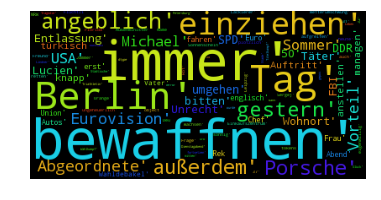

In [20]:
text=(str( train_data.tokens))

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off");

## Automatische Klassifizierung der Texte

In [21]:
#öffnen Testdatensatzes
from pandas import read_csv
test = pandas.read_csv('test.csv',encoding = "ISO-8859-1")

Es wird einen CountVectorizer instanziert und dann die methode fit_transform aufgerufen, was zwei Dinge macht: er lernt das Vokabular des Korpus und extrahiert Wortzählungsmerkmale.


In [22]:
import numpy
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(list(train_data['description']))

Die Berechnung der tfidf-Matrix erfolgt mit der TfidfTransformer-Methode von scikit-learn. Es wird ein Dictionary erstellt, dass die Token auf ihre tfidf-Werte abbildet

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer = TfidfTransformer(use_idf=False).fit(counts)
train_tf = tf_transformer.transform(counts)

### Naive Bayes

Es wird ein Naive Bayes-Klassifikator eingesetzt, um aus den Features zu lernen. Ein Naive Bayes-Klassifikator wendet den Satz von Bayes an.Er ordnet jedes Objekt(in diesem Fall Wort) der Klasse zu, zu der es mit der größten Wahrscheinlichkeit gehört, oder bei der durch die Einordnung die wenigsten Kosten entstehen. Genau genommen handelt es sich um eine mathematische Funktion, die jedem Punkt eines Merkmalsraums eine Klasse zuordnet.


In [24]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
targets = train_data['author'].values
classifier.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Ausprobiere:einige Beispiele werden erstellt und auf ihnen Vorhersagen für dazugehörihen Author gemacht .

In [25]:
examples = ['Mehr Konsum, mehr Exporte, mehr Investitionen: Zum Jahresbeginn hat sich das Wachstum in Deutschland beschleunigt. Das lag auch am Wetter',
            "Ältere Menschen in Nordrhein-Westfalen müssen seit einigen Wochen verstärkt fürchten, auf dem Friedhof Opfer eines Raubüberfalls zu werden",
            "Bremen – Großeinsatz für die Polizei in Bremer Einkaufszentrum Waterfront.Ein Mann (29) ist dort am Samstag um 19.40 Uhr niedergestochenund schwer verletzt worden.",
            "NRW-Regierungschefin Kraft schließt ein Bündnis mit der Linken aus. Bei einem Wahlkampfauftritt von Sahra Wagenknecht zeigt sich: Das könnte der Linken Stimmen bringen"
           ]
example_counts = count_vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

array(['spiegel', 'focus', 'bild', 'zeit'], 
      dtype='<U7')

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

 Pipeline wird verwendet, um die Feature-Extraktion und Klassifizierung in eine Operation zu verbinden.

In [27]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer',  CountVectorizer()),
    ('tfidf_transformer',  TfidfTransformer()),
    ('classifier',  MultinomialNB()) ])

pipeline.fit(train_data['description'].values, train_data['author'].values)
pipeline.predict(examples)

array(['spiegel', 'focus', 'bild', 'zeit'], 
      dtype='<U7')

#### Bewertung der Leistung auf einer Testprobe 

In [28]:
from sklearn import metrics
import numpy as np



docs_test = test.description


predicted = pipeline.predict(docs_test)
np.mean(predicted == test.author)

0.67000000000000004

In diesem Fall ergibt sich eine Genauigkeit von 66%. 
Um die Ergebnis zu verebessern wird das gleiche Verfahren unter Verwendung eines linearen Support-Vektor (Support-Vektor-Maschine (SVM))getestet. 
Das Lehrmodell kann einfach geändert werden,in dem ein anderes Klassifikationsobjekt in der Pipeline eingesetzt wird:

In [29]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('count_vectorizer', CountVectorizer()),
                     ('tfidf_transformer',  TfidfTransformer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, n_iter=5, random_state=42)), ])
t = text_clf.fit(train_data['description'].values, train_data['author'].values)
predicted = text_clf.predict(docs_test)
np.mean(predicted == test.author) 


0.68999999999999995

In [30]:
print(metrics.classification_report(test.author, predicted))

print(metrics.confusion_matrix(test.author, predicted))

             precision    recall  f1-score   support

       bild       0.75      0.96      0.84        25
      focus       0.69      0.72      0.71        25
    spiegel       0.65      0.60      0.63        25
       zeit       0.63      0.48      0.55        25

avg / total       0.68      0.69      0.68       100

[[24  0  0  1]
 [ 4 18  1  2]
 [ 1  5 15  4]
 [ 3  3  7 12]]


#### KNN Klassifikator
K-Nearest Neighbor (KNN)-Klassifikation ist eine einfache, aber dennoch sehr effiziente Klassifikationsmethode. Der entscheidende Gedanke hinter der KNN-Klassifikation ist, dass einander ähnliche Messwerte zu gleichen Klassen gehören. Somit muss man nur die Klassenbezeichner einer gewissen Zahl der nächsten Nachbarn kennen, um die Klassennummer eines unbekannten Messwertes schätzen zu können.

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_clf = Pipeline([('count_vectorizer', CountVectorizer()),
                    ('tfidf_transformer',  TfidfTransformer()),
                      ('knn', KNeighborsClassifier()) ])
K=knn_clf.fit(train_data['description'].values, train_data['author'].values)
predicted = knn_clf.predict(docs_test)
np.mean(predicted == test.author) 

0.52000000000000002

In [32]:
print(metrics.classification_report(test.author, predicted))

print(metrics.confusion_matrix(test.author, predicted))

             precision    recall  f1-score   support

       bild       0.80      0.64      0.71        25
      focus       0.67      0.48      0.56        25
    spiegel       0.35      0.76      0.48        25
       zeit       0.62      0.20      0.30        25

avg / total       0.61      0.52      0.51       100

[[16  1  8  0]
 [ 1 12 11  1]
 [ 2  2 19  2]
 [ 1  3 16  5]]


#### Entscheidungsbäume

In [33]:

from sklearn.tree import DecisionTreeClassifier

text_dtc = Pipeline([('count_vectorizer', CountVectorizer()),
                      ('tfidf_transformer',  TfidfTransformer()),
                      ('dtc', DecisionTreeClassifier()), ])

D=text_dtc.fit(train_data['description'].values, train_data['author'].values)
predicted = text_dtc.predict(docs_test)
np.mean(predicted == test.author)

0.63

In [34]:
print(metrics.classification_report(test.author, predicted))

print(metrics.confusion_matrix(test.author, predicted))

             precision    recall  f1-score   support

       bild       0.70      0.64      0.67        25
      focus       0.87      0.52      0.65        25
    spiegel       0.60      0.60      0.60        25
       zeit       0.51      0.76      0.61        25

avg / total       0.67      0.63      0.63       100

[[16  0  2  7]
 [ 3 13  4  5]
 [ 2  2 15  6]
 [ 2  0  4 19]]


#### Logistische Regression

In [35]:
from sklearn.linear_model import LogisticRegression

# 2. instantiate a logistic regression model
logreg = LogisticRegression()
text_logreg = Pipeline([('count_vectorizer', CountVectorizer()),
                      ('tfidf_transformer',  TfidfTransformer()),
                      ('logreg',  LogisticRegression()), ])

l=text_logreg.fit(train_data['description'].values, train_data['author'].values)
predicted = text_logreg.predict(docs_test)
np.mean(predicted == test.author)

0.69999999999999996

In [36]:
print(metrics.classification_report(test.author, predicted))

print(metrics.confusion_matrix(test.author, predicted))

             precision    recall  f1-score   support

       bild       0.73      0.96      0.83        25
      focus       0.69      0.72      0.71        25
    spiegel       0.70      0.56      0.62        25
       zeit       0.67      0.56      0.61        25

avg / total       0.70      0.70      0.69       100

[[24  0  0  1]
 [ 4 18  1  2]
 [ 2  5 14  4]
 [ 3  3  5 14]]


# Clustering

K-means

Der Ausgangspunkt ist die tf-idf Matrix tfidf_counts:


In [53]:
tfidf_counts.shape

(900, 5303)

Ein k-Means-Algorithmus ist ein Verfahren zur Vektorquantisierung, das auch zur Clusteranalyse verwendet wird. Dabei wird aus einer Menge von ähnlichen Objekten eine vorher bekannte Anzahl von k Gruppen gebildet. Der Algorithmus ist eine der am häufigsten verwendeten Techniken zur Gruppierung von Objekten, da er schnell die Zentren der Cluster findet. Dabei bevorzugt der Algorithmus Gruppen mit geringer Varianz, und ähnlicher Größe.

In [54]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.cluster import MiniBatchKMeans

num_clusters = 30
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(tfidf_counts)
kmeans_clusters = kmeans.predict(tfidf_counts)
kmeans_distances = kmeans.transform(tfidf_counts)

Die ersten 5 Beschreibung und die zugehörigen Cluster 

In [55]:
for (i, desc),author in zip(enumerate(train_data.description),train_data['author']):
    if(i < 5):
        print("Cluster " + str(kmeans_clusters[i]) + ": " + desc + 
              "(distance: " + str(kmeans_distances[i][kmeans_clusters[i]]) + ")")
        print('author: ',author)
        print('---')

Cluster 2: Alle Rettungsversuche blieben erfolglos: Mit einer Pro-Kopf-Verschuldung von knapp 10.000 Euro steckt Oberhausen tiefer in den roten Zahlen als je zuvor. Die Verzweiflung wächst überall – vor allem in der Innenstadt, die langsam ausblutet.(distance: 0.99405921197)
author:  focus
---
Cluster 4: RB Leipzig gegen den FC Bayern am 33. Bundesliga-Spieltag, das hätte ein echter Kracher im Titelkampf sein können. So aber wird das Spiel zum Schaulaufen des Meisters. Würze ist dennoch drin: Der Aufsteiger kann einen Bayern-Rekord knacken. Der Live-Ticker.(distance: 0.94642443659)
author:  focus
---
Cluster 2: Mit der eigenwilligen Interpretation seines Haftantritts nach Steuerhinterziehung ruft Uli Hoeneß ausgerechnet nach einem Auftritt in der Steueroase Liechtenstein Verwunderung hervor. Die Empörung zeigt: Rückhalt hat der Bayern-Präsident in moralischen Fragen nicht mehr zu erwarten.(distance: 0.993954688344)
author:  focus
---
Cluster 3: Das Eigenheim ist die beste Geldanlage fü


Das sagt nicht viel aus. Das Rausfiltern der wichtigsten Schlüsselwörter, die jeden Cluster beschreiben.


In [56]:
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    aux = ''
    for j in sorted_centroids[i, :10]:
        aux += terms[j] + ' | '
    print(aux)
    print() 

Cluster 0:
recht | grünert | Netz | tattoo | convention | Aufschrei | getrocknet | Hundewelpe | Luxemburg | angeboten.die | 

Cluster 1:
*** | bildplus | <UNKNOWN> | – | schätzen | klein | Bürgermeisterin | suchen | mehr | hechingen | 

Cluster 2:
neu | – | Präsident | macron | Europa | erst | @card@ | mehr | Emmanuel | groß | 

Cluster 3:
sagen | deutsch | türkisch | Focus | online | abgeordnet | incirlik | Luftwaffenstützpunkt | Liebesleben | gesundheitlich | 

Cluster 4:
spielen | Deutschland | stehen | Viertelfinale | starten | rb | enden | eishockey-wm | Leipzig | live-ticker | 

Cluster 5:
Donnerstag | Dauereinsatz | Hauptstadt | Tötungsdelikt | bewegen | vergangen | fünf | frauen | opfern | vier | 

Cluster 6:
fallen | Bundesanwaltschaft | Bombenangriff | karlsruhe | zurückgeben | bvb-bus | Ermittlung | bild-informationen | staatsanwaltschaft | dortmund | 

Cluster 7:
Landtagswahl | nordrhein-westfalen | spd | Bundestagswahl | Hannelore | laschet | letzt | Armin | cdu | schaffen

Plotten der Cluster. Um dies zu tun, muss die Dimensionalität von kmeans_distances auf 2 reduzieren.

In [57]:
tsne_kmeans = tsne_model.fit_transform(kmeans_distances)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 900 / 900
[t-SNE] Mean sigma: 0.018482
[t-SNE] Error after 100 iterations with early exaggeration: 0.692404
[t-SNE] Error after 175 iterations: 0.624234


In [47]:


import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook



In [48]:


output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="tf-idf clustering of the news",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)



Loading BokehJS ...

In [49]:
colormap = np.array(["#6d8dca", "#69de53", "#723bca", "#c3e14c", "#c84dc9", "#68af4e", "#6e6cd5",
"#e3be38", "#4e2d7c", "#5fdfa8", "#d34690", "#3f6d31", "#d44427", "#7fcdd8", "#cb4053", "#5e9981",
"#803a62", "#9b9e39", "#c88cca", "#e1c37b", "#34223b", "#bdd8a3", "#6e3326", "#cfbdce", "#d07d3c",
"#52697d", "#7d6d33", "#d27c88", "#36422b", "#b68f79"])

plot_kmeans = bp.figure(plot_width=700, plot_height=600, title="KMeans clustering of the news",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

In [50]:
kmeans_df = pd.DataFrame(tsne_kmeans, columns=['x', 'y'])
kmeans_df['cluster'] = kmeans_clusters
kmeans_df['description'] = train_data['description']
kmeans_df['author'] =train_data['author']

In [51]:
plot_kmeans.scatter(x='x', y='y',  color=colormap[kmeans_clusters])


In [52]:
hover = plot_kmeans.select(dict(type=HoverTool))
hover.tooltips={"description": "@description", "author": "@author", "cluster":"@cluster"}
show(plot_kmeans)